In [1]:
!pip install torch torchvision torchaudio

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time
import numpy as np
import torch.nn.functional as F





from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10

In [4]:
# Set up transformations: normalize the dataset with mean and std deviation of CIFAR-10
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the image to [-1, 1]
])

# Downloading the CIFAR-10 training set
trainset = CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

# Downloading the CIFAR-10 test set
testset = CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)


100%|██████████| 170498071/170498071 [00:03<00:00, 43255382.82it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


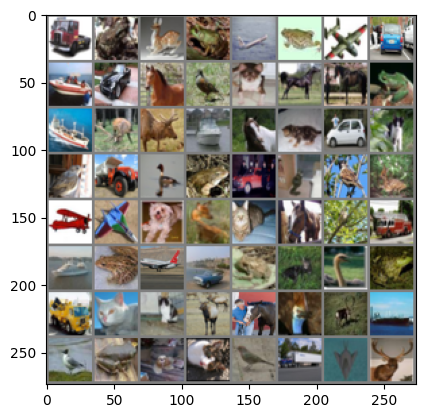

In [5]:

# Function to show images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

In [6]:
from torchvision.datasets import CIFAR10

# Load CIFAR-10 training data
trainset = CIFAR10(root='./data', train=True, download=True)

# Examples of metadata you can extract:
print("Number of samples in the training dataset:", len(trainset))
print("Number of classes:", len(trainset.classes))
print("Class names:", trainset.classes)
print("Sample image shape:", trainset[0][0].size)

# Load CIFAR-10 test data
testset = CIFAR10(root='./data', train=False, download=True)

# Metadata for test data
print("Number of samples in the test dataset:", len(testset))

Files already downloaded and verified
Number of samples in the training dataset: 50000
Number of classes: 10
Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Sample image shape: (32, 32)
Files already downloaded and verified
Number of samples in the test dataset: 10000


In [7]:

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Using device:', device)


Using device: cpu


In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # First Convolutional Layer
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  # 3 input channels, 32 output channels, 3x3 kernel size
        self.pool = nn.MaxPool2d(2, 2)  # 2x2 Max pooling
        # Second Convolutional Layer
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        # Fully Connected Layers
        self.fc1 = nn.Linear(64 * 8 * 8, 256)  # After two pooling layers, size is 8x8
        self.fc2 = nn.Linear(256, 10)  # 10 classes
        # Dropout
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Activation and then pooling
        x = self.pool(F.relu(self.conv2(x)))  # Activation and then pooling
        x = x.view(-1, 64 * 8 * 8)  # Flatten the tensor for the fully connected layer
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

net = Net().to(device)


In [9]:
# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)  # Using Adam optimizer

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


Training with learning rate: 0.001
Finished Training with learning rate: 0.001 in 1102.11 seconds
Training with learning rate: 0.01
Finished Training with learning rate: 0.01 in 1137.34 seconds
Training with learning rate: 0.1
Finished Training with learning rate: 0.1 in 1097.78 seconds


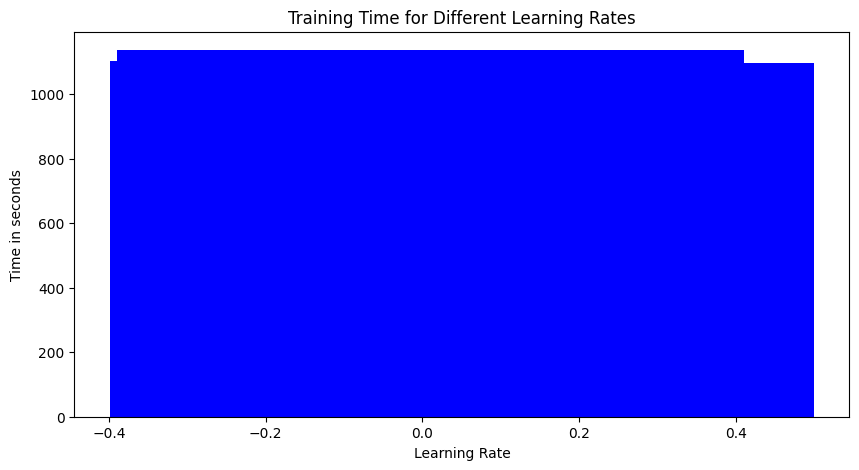

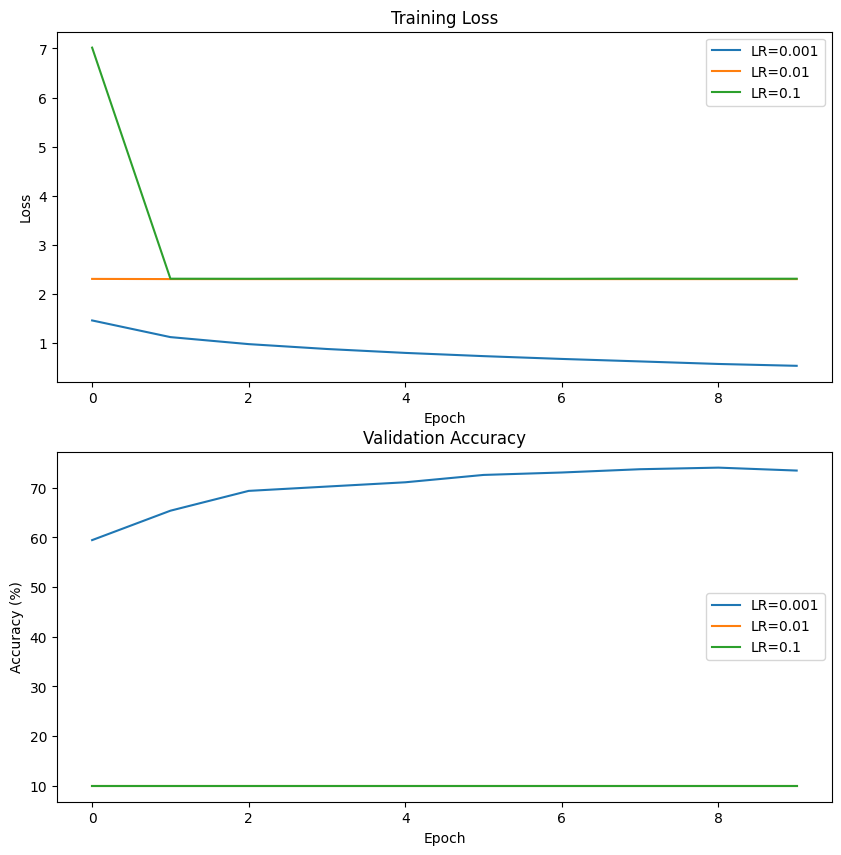

In [12]:

learning_rates = [0.001, 0.01, 0.1]
results = {}
timing_results = {}

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    net = Net().to(device)  # Reinitialize the network for each run
    optimizer = optim.Adam(net.parameters(), lr=lr)
    training_loss = []
    validation_accuracy = []
    start_time = time.time()

    for epoch in range(10):  # Run for a pre-defined number of epochs
        net.train()
        epoch_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        # Validation phase
        net.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                images, labels = images.to(device), labels.to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        validation_accuracy.append(100 * correct / total)
        training_loss.append(epoch_loss / len(trainloader))

    elapsed_time = time.time() - start_time
    timing_results[lr] = elapsed_time
    results[lr] = (training_loss, validation_accuracy)
    print(f"Finished Training with learning rate: {lr} in {elapsed_time:.2f} seconds")

# Plotting training times
plt.figure(figsize=(10, 5))
plt.bar(timing_results.keys(), timing_results.values(), color='blue')
plt.title('Training Time for Different Learning Rates')
plt.xlabel('Learning Rate')
plt.ylabel('Time in seconds')
plt.show()


fig, axs = plt.subplots(2, 1, figsize=(10, 10))
for lr, (losses, accuracies) in results.items():
    axs[0].plot(losses, label=f"LR={lr}")
    axs[1].plot(accuracies, label=f"LR={lr}")

axs[0].set_title('Training Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].set_title('Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy (%)')
axs[1].legend()

plt.show()



# Learning Rate




In [ ]:
import time
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

# Assuming 'Net', 'device', 'trainloader', 'testloader', and 'criterion' are predefined.

learning_rates = [0.001, 0.01, 0.1]
results = {}
timing_results = {}

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    net = Net().to(device)  # Reinitialize the network for each run
    optimizer = optim.Adam(net.parameters(), lr=lr)
    training_loss = []
    validation_accuracy = []
    start_time = time.time()

    for epoch in range(10):  # Run for a pre-defined number of epochs
        net.train()
        epoch_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        # Calculate average loss for the epoch
        avg_epoch_loss = epoch_loss / len(trainloader)
        training_loss.append(avg_epoch_loss)

        # Validation phase
        net.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                images, labels = images.to(device), labels.to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        epoch_accuracy = 100 * correct / total
        validation_accuracy.append(epoch_accuracy)

        print(f"Epoch {epoch+1}: Loss = {avg_epoch_loss:.4f}, Accuracy = {epoch_accuracy:.2f}%")

    elapsed_time = time.time() - start_time
    timing_results[lr] = elapsed_time
    results[lr] = (training_loss, validation_accuracy)
    print(f"Finished Training with learning rate: {lr} in {elapsed_time:.2f} seconds")

# Plotting training times
plt.figure(figsize=(10, 5))
plt.bar([str(k) for k in timing_results.keys()], timing_results.values(), color='blue')
plt.title('Training Time for Different Learning Rates')
plt.xlabel('Learning Rate')
plt.ylabel('Time in seconds')
plt.show()

# Plotting training loss and validation accuracy
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
for lr, (losses, accuracies) in results.items():
    axs[0].plot(losses, label=f"LR={lr}")
    axs[1].plot(accuracies, label=f"LR={lr}")

axs[0].set_title('Training Loss')
axs[0].set_xlabel('Epoch')
axs[0.set_ylabel('Loss')
axs[0].legend()

axs[1].set_title('Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy (%)')
axs[1].legend()

plt.show()


SyntaxError: invalid decimal literal (<ipython-input-13-6c48fcd7d9ba>, line 76)

# Initialization

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, init_method=None):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)

        if init_method == 'xavier':
            self.apply(self.xavier_init)
        elif init_method == 'he':
            self.apply(self.he_init)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

    def xavier_init(self, m):
        if isinstance(m, (nn.Conv2d, nn.Linear)):
            nn.init.xavier_uniform_(m.weight)
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)

    def he_init(self, m):
        if isinstance(m, (nn.Conv2d, nn.Linear)):
            nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)


In [ ]:
# Import necessary modules
import time
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

# Assuming 'Net', 'device', 'trainloader', 'testloader' are predefined

# Optimizers to test
optimizers = {
    'SGD': optim.SGD,
    'Adam': optim.Adam,
    'RMSprop': optim.RMSprop
}

results = {}
for name, opt in optimizers.items():
    print(f"Training with {name} optimizer...")
    net = Net().to(device)  # Reinitialize the network for each run
    optimizer = opt(net.parameters(), lr=0.001)  # Using a constant learning rate for fair comparison
    criterion = nn.CrossEntropyLoss()
    training_losses = []
    validation_accuracies = []
    start_time = time.time()

    for epoch in range(10):  # Number of epochs for each experiment
        net.train()
        epoch_loss = 0.0
        for i, data in enumerate(trainloader):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_epoch_loss = epoch_loss / len(trainloader)
        training_losses.append(avg_epoch_loss)

        net.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                images, labels = images.to(device), labels.to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        validation_accuracy = 100 * correct / total
        validation_accuracies.append(validation_accuracy)

        print(f"Optimizer {name} - Epoch {epoch+1}: Loss = {avg_epoch_loss:.4f}, Accuracy = {validation_accuracy:.2f}%")

    elapsed_time = time.time() - start_time
    results[name] = {
        'Training Loss': training_losses,
        'Validation Accuracy': validation_accuracies,
        'Training Time': elapsed_time
    }
    print(f"Finished Training with {name} optimizer in {elapsed_time:.2f} seconds")

# Plotting results
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
for name, metrics in results.items():
    axs[0].plot(metrics['Training Loss'], label=f"{name}")
    axs[1].plot(metrics['Validation Accuracy'], label=f"{name}")
    axs[2].bar(name, metrics['Training Time'])

axs[0].set_title('Training Loss by Optimizer')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].set_title('Validation Accuracy by Optimizer')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy (%)')
axs[1].legend()

axs[2].set_title('Training Time by Optimizer')
axs[2].set_xlabel('Optimizer')
axs[2].set_ylabel('Time in seconds')

plt.tight_layout()
plt.show()


In [ ]:

class Net(nn.Module):
    def __init__(self, init_method=None):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)

        if init_method == 'xavier':
            self.apply(self.xavier_init)
        elif init_method == 'he':
            self.apply(self.he_init)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

    def xavier_init(self, m):
        if isinstance(m, (nn.Conv2d, nn.Linear)):
            nn.init.xavier_uniform_(m.weight)
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)

    def he_init(self, m):
        if isinstance(m, (nn.Conv2d, nn.Linear)):
            nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)


In [ ]:


# Prepare data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# Assume Net is a defined model class that accepts an init_method parameter for different initializations
# Testing different initialization methods
init_methods = ['default', 'xavier', 'he']
results = {}

for method in init_methods:
    print(f"Training using {method} initialization")
    net = Net(init_method=method).to(device)  # Assuming 'device' is defined, e.g., device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    training_losses = []
    validation_accuracies = []
    start_time = time.time()

    for epoch in range(10):
        net.train()
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        average_loss = running_loss / len(trainloader)
        training_losses.append(average_loss)

        net.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        validation_accuracy = correct / total * 100
        validation_accuracies.append(validation_accuracy)

        print(f"Epoch {epoch+1}: Loss = {average_loss:.4f}, Accuracy = {validation_accuracy:.2f}%")

    elapsed_time = time.time() - start_time
    results[method] = {'Training Loss': training_losses, 'Validation Accuracy': validation_accuracies, 'Training Time': elapsed_time}
    print(f"Finished training with {method} in {elapsed_time:.2f} seconds")

# Plotting the results
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))
for method, data in results.items():
    ax1.plot(data['Training Loss'], label=f"{method} init")
    ax2.plot(data['Validation Accuracy'], label=f"{method} init")
    ax3.bar(method, data['Training Time'])

ax1.set_title('Training Loss by Initialization Method')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.set_title('Validation Accuracy by Initialization Method')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()

ax3.set_title('Training Time by Initialization Method')
ax3.set_xlabel('Initialization Method')
ax3.set_ylabel('Time (seconds)')

plt.tight_layout()
plt.show()


In [ ]:


# Model definition
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Prepare data transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Different batch sizes to test
batch_sizes = [32, 64, 128]
results = {}

for batch_size in batch_sizes:
    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    print(f"Training with batch size: {batch_size}")
    net = Net().to(torch.device("cuda:0" if torch.cuda.is_available() else "cpu"))
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    training_losses = []
    validation_accuracies = []
    start_time = time.time()

    for epoch in range(10):
        net.train()
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader):
            inputs, labels = inputs.to(net.device), labels.to(net.device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_training_loss = running_loss / len(trainloader)
        training_losses.append(avg_training_loss)

        net.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(net.device), labels.to(net.device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)
        validation_accuracy = correct / total * 100
        validation_accuracies.append(validation_accuracy)

        print(f"Epoch {epoch+1} - Batch Size {batch_size}: Loss = {avg_training_loss:.4f}, Accuracy = {validation_accuracy:.2f}%")

    elapsed_time = time.time() - start_time
    results[batch_size] = {
        'Training Loss': training_losses,
        'Validation Accuracy': validation_accuracies,
        'Training Time': elapsed_time
    }
    print(f"Finished training with batch size: {batch_size} in {elapsed_time:.2f} seconds")

# Plotting the results
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))
for batch_size, data in results.items():
    ax1.plot(data['Training Loss'], label=f"Batch Size {batch_size}")
    ax2.plot(data['Validation Accuracy'], label=f"Batch Size {batch_size}")
    ax3.bar(f"Batch {batch_size}", data['Training Time'])

ax1.set_title('Training Loss by Batch Size')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.set_title('Validation Accuracy by Batch Size')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()

ax3.set_title('Training Time by Batch Size')
ax3.set_xlabel('Batch Size')
ax3.set_ylabel('Time (seconds)')

plt.tight_layout()
plt.show()


In [ ]:

# Model definition
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Prepare data transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Different batch sizes to test
batch_sizes = [32, 64, 128]
results = {}

for batch_size in batch_sizes:
    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    print(f"Training with batch size: {batch_size}")
    net = Net().to(torch.device("cuda:0" if torch.cuda.is_available() else "cpu"))
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    training_losses = []
    validation_accuracies = []
    start_time = time.time()

    for epoch in range(10):
        net.train()
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader):
            inputs, labels = inputs.to(net.device), labels.to(net.device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_training_loss = running_loss / len(trainloader)
        training_losses.append(avg_training_loss)

        net.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(net.device), labels.to(net.device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)
        validation_accuracy = correct / total * 100
        validation_accuracies.append(validation_accuracy)

        print(f"Epoch {epoch+1} - Batch Size {batch_size}: Loss = {avg_training_loss:.4f}, Accuracy = {validation_accuracy:.2f}%")

    elapsed_time = time.time() - start_time
    results[batch_size] = {
        'Training Loss': training_losses,
        'Validation Accuracy': validation_accuracies,
        'Training Time': elapsed_time
    }
    print(f"Finished training with batch size: {batch_size} in {elapsed_time:.2f} seconds")

# Plotting the results
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))
for batch_size, data in results.items():
    ax1.plot(data['Training Loss'], label=f"Batch Size {batch_size}")
    ax2.plot(data['Validation Accuracy'], label=f"Batch Size {batch_size}")
    ax3.bar(f"Batch {batch_size}", data['Training Time'])

ax1.set_title('Training Loss by Batch Size')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.set_title('Validation Accuracy by Batch Size')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()

ax3.set_title('Training Time by Batch Size')
ax3.set_xlabel('Batch Size')
ax3.set_ylabel('Time (seconds)')

plt.tight_layout()
plt.show()


In [ ]:


class BaselineNet(nn.Module):
    # Original network structure
    def __init__(self):
        super(BaselineNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

class IncreasedDepthNet(nn.Module):
    # Adding an extra convolutional layer
    def __init__(self):
        super(IncreasedDepthNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)  # New deeper layer
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))  # Deeper network
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

class IncreasedWidthNet(nn.Module):
    # Increasing the number of neurons in the fully connected layer
    def __init__(self):
        super(IncreasedWidthNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)  # Increased neurons
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [ ]:
# Prepare data transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

models = {
    'Baseline': BaselineNet(),
    'Increased Depth': IncreasedDepthNet(),
    'Increased Width': IncreasedWidthNet()
}

results = {}

for name, model in models.items():
    print(f"Training {name} model...")
    net = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    training_losses = []
    validation_accuracies = []
    start_time = time.time()

    for epoch in range(10):
        net.train()
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch+1} Loss for {name}: {running_loss / len(trainloader)}")

        net.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)
        validation_accuracy = correct / total * 100
        validation_accuracies.append(validation_accuracy)
        training_losses.append(running_loss / len(trainloader))
        print(f"Epoch {epoch+1} Accuracy for {name}: {validation_accuracy}%")

    elapsed_time = time.time() - start_time
    results[name] = {
        'Training Loss': training_losses,
        'Validation Accuracy': validation_accuracies,
        'Training Time': elapsed_time
    }
    print(f"Finished training {name} model in {elapsed_time:.2f} seconds")

# Plotting the results
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))
for name, data in results.items():
    ax1.plot(data['Training Loss'], label=f"{name}")
    ax2.plot(data['Validation Accuracy'], label=f"{name}")
    ax3.bar(name, data['Training Time'])

ax1.set_title('Training Loss by Model Configuration')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.set_title('Validation Accuracy by Model Configuration')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()

ax3.set_title('Training Time by Model Configuration')
ax3.set_xlabel('Model Configuration')
ax3.set_ylabel('Time (seconds)')

plt.tight_layout()
plt.show()


In [ ]:

# Prepare data transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

models = {
    'Baseline': BaselineNet(),
    'Increased Depth': IncreasedDepthNet(),
    'Increased Width': IncreasedWidthNet()
}

results = {}

for name, model in models.items():
    print(f"Training {name} model...")
    net = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    training_losses = []
    validation_accuracies = []
    start_time = time.time()

    for epoch in range(10):
        net.train()
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch+1} Loss for {name}: {running_loss / len(trainloader)}")

        net.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)
        validation_accuracy = correct / total * 100
        validation_accuracies.append(validation_accuracy)
        training_losses.append(running_loss / len(trainloader))
        print(f"Epoch {epoch+1} Accuracy for {name}: {validation_accuracy}%")

    elapsed_time = time.time() - start_time
    results[name] = {
        'Training Loss': training_losses,
        'Validation Accuracy': validation_accuracies,
        'Training Time': elapsed_time
    }
    print(f"Finished training {name} model in {elapsed_time:.2f} seconds")

# Plotting the results
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))
for name, data in results.items():
    ax1.plot(data['Training Loss'], label=f"{name}")
    ax2.plot(data['Validation Accuracy'], label=f"{name}")
    ax3.bar(name, data['Training Time'])

ax1.set_title('Training Loss by Model Configuration')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.set_title('Validation Accuracy by Model Configuration')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()

ax3.set_title('Training Time by Model Configuration')
ax3.set_xlabel('Model Configuration')
ax3.set_ylabel('Time (seconds)')

plt.tight_layout()
plt.show()


In [ ]:

# Model Definition
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

net = Net().to(device)

# Data transformation and loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# Loss Functions
loss_functions = {
    'Cross-Entropy': nn.CrossEntropyLoss(),
    'L1 Loss': nn.L1Loss(),
    'Smooth L1 Loss': nn.SmoothL1Loss()
}

results = {}
for name, criterion in loss_functions.items():
    print(f"Training with {name}...")
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    training_losses = []
    validation_accuracies = []
    start_time = time.time()

    for epoch in range(10):  # Number of epochs
        net.train()
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            if name == 'L1 Loss' or name == 'Smooth L1 Loss':
                labels_one_hot = F.one_hot(labels, 10).float()
                loss = criterion(outputs, labels_one_hot)
            else:
                loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Print loss every epoch
        print(f"Epoch {epoch+1} Loss for {name}: {running_loss / len(trainloader)}")

        net.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)
        validation_accuracy = 100 * correct / total
        validation_accuracies.append(validation_accuracy)
        training_losses.append(running_loss / len(trainloader))

        # Print accuracy every epoch
        print(f"Epoch {epoch+1} Accuracy for {name}: {validation_accuracy}%")

    elapsed_time = time.time() - start_time
    results[name] = {
        'Training Loss': training_losses,
        'Validation Accuracy': validation_accuracies,
        'Training Time': elapsed_time
    }
    print(f"Finished training with {name} in {elapsed_time:.2f} seconds")

# Plotting the results
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))
for name, data in results.items():
    ax1.plot(data['Training Loss'], label=f"{name}")
    ax2.plot(data['Validation Accuracy'], label=f"{name}")
    ax3.bar(name, data['Training Time'])

ax1.set_title('Training Loss by Loss Function')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.set_title('Validation Accuracy by Loss Function')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()

ax3.set_title('Training Time by Loss Function')
ax3.set_xlabel('Loss Function')
ax3.set_ylabel('Time (seconds)')

plt.tight_layout()
plt.show()


In [ ]:

# Model Definition
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

net = Net().to(device)

# Data transformation and loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# Loss Functions
loss_functions = {
    'Cross-Entropy': nn.CrossEntropyLoss(),
    'L1 Loss': nn.L1Loss(),
    'Smooth L1 Loss': nn.SmoothL1Loss()
}

results = {}
for name, criterion in loss_functions.items():
    print(f"Training with {name}...")
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    training_losses = []
    validation_accuracies = []
    start_time = time.time()

    for epoch in range(10):  # Number of epochs
        net.train()
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            if name == 'L1 Loss' or name == 'Smooth L1 Loss':
                labels_one_hot = F.one_hot(labels, 10).float()
                loss = criterion(outputs, labels_one_hot)
            else:
                loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Print loss every epoch
        print(f"Epoch {epoch+1} Loss for {name}: {running_loss / len(trainloader)}")

        net.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)
        validation_accuracy = 100 * correct / total
        validation_accuracies.append(validation_accuracy)
        training_losses.append(running_loss / len(trainloader))

        # Print accuracy every epoch
        print(f"Epoch {epoch+1} Accuracy for {name}: {validation_accuracy}%")

    elapsed_time = time.time() - start_time
    results[name] = {
        'Training Loss': training_losses,
        'Validation Accuracy': validation_accuracies,
        'Training Time': elapsed_time
    }
    print(f"Finished training with {name} in {elapsed_time:.2f} seconds")

# Plotting the results
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))
for name, data in results.items():
    ax1.plot(data['Training Loss'], label=f"{name}")
    ax2.plot(data['Validation Accuracy'], label=f"{name}")
    ax3.bar(name, data['Training Time'])

ax1.set_title('Training Loss by Loss Function')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.set_title('Validation Accuracy by Loss Function')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()

ax3.set_title('Training Time by Loss Function')
ax3.set_xlabel('Loss Function')
ax3.set_ylabel('Time (seconds)')

plt.tight_layout()
plt.show()
